# Dataset Creation for Linear Regression

In [3]:
# importing libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings("ignore")

In [2]:
# import MICH data
matHealth = pd.read_csv('../data/PAHealth_MaternalChildHealth_20221127.csv').iloc[1:, 1:]
print(matHealth.shape)
matHealth.head()


(67, 49)


,County0,MICH-01_2011-2015,MICH-01_2012-2016,MICH-01_2013-2017,MICH-01_2014-2018,MICH-01_2015-2019,MICH-01_MetGoal,MICH-02_2011-2015,MICH-02_2012-2016,MICH-02_2013-2017,...,MICH-10_2013-2017,MICH-10_2014-2018,MICH-10_2015-2019,MICH-10_MetGoal,MICH-13_2011-2015,MICH-13_2012-2016,MICH-13_2013-2017,MICH-13_2014-2018,MICH-13_2015-2019,MICH-13_MetGoal
1,Adams,4.8,5.3,4.4,6.0,5.9,No,3.8,3.7,4.8,...,85.8,87.0,87.7,No,44.5,41.4,42.6,40.7,36.8,No
2,Allegheny,5.6,5.7,5.4,5.4,5.5,Yes,6.1,6.1,6.1,...,89.0,89.8,90.8,No,31.7,29.4,32.5,32.7,24.7,No
3,Armstrong,4.9,5.6,6.4,6.9,7.9,No,4.6,5.7,5.8,...,76.9,78.1,79.6,No,36.6,34.2,35.6,32.0,30.6,No
4,Beaver,7.6,7.3,6.9,7.3,6.4,No,7.2,6.8,6.6,...,80.9,82.5,83.5,No,41.2,41.8,37.4,39.2,33.8,No
5,Bedford,7.1,7.5,6.7,5.9,6.0,No,6.8,5.5,6.4,...,80.0,81.5,83.3,No,47.2,43.3,45.4,39.3,42.9,No


In [45]:
matHealth['MICH-01_MetGoal'][matHealth['MICH-01_MetGoal']=='No'] = 0
matHealth['MICH-01_MetGoal'][matHealth['MICH-01_MetGoal']=='DSU'] = 0
matHealth['MICH-01_MetGoal'][matHealth['MICH-01_MetGoal']=='Yes'] = 1
matHealth['MICH-02_MetGoal'][matHealth['MICH-02_MetGoal']=='No'] = 0
matHealth['MICH-02_MetGoal'][matHealth['MICH-02_MetGoal']=='DSU'] = 0
matHealth['MICH-02_MetGoal'][matHealth['MICH-02_MetGoal']=='Yes'] = 1
matHealth['MICH-07_MetGoal'][matHealth['MICH-07_MetGoal']=='No'] = 0
matHealth['MICH-07_MetGoal'][matHealth['MICH-07_MetGoal']=='DSU'] = 0
matHealth['MICH-07_MetGoal'][matHealth['MICH-07_MetGoal']=='Yes'] = 1

matHealth['goals_met'] = matHealth['MICH-01_MetGoal'].astype(float) + matHealth['MICH-02_MetGoal'].astype(float) + matHealth['MICH-07_MetGoal'].astype(float)
matHealth['goals_met']

1     2.0
2     1.0
3     0.0
4     1.0
5     1.0
     ... 
63    2.0
64    1.0
65    3.0
66    0.0
67    1.0
Name: goals_met, Length: 67, dtype: float64

In [46]:
# Grab columns from most recent goal year outcomes
cols = ['County0']
cols.extend([m for m in matHealth.columns if ('2019' in m)])
cols

['County0',
 'MICH-01_2015-2019',
 'MICH-02_2015-2019',
 'MICH-03_2015-2019',
 'MICH-06_2015-2019',
 'MICH-07_2015-2019',
 'MICH-08_2015-2019',
 'MICH-10_2015-2019',
 'MICH-13_2015-2019']

In [7]:
# create an outcomes based MICH goals
outcomes = matHealth[cols]
outcomes['Total_MetGoals'] = goals_met['Total_MetGoals']
outcomes['MetGoal_Reached'] = (outcomes['Total_MetGoals'] > 0).astype(int)
outcomes['goals_met'] = goals_met['goals_met']
outcomes.rename(columns={'County0': 'County'}, inplace=True)
outcomes

,County,MICH-01_2015-2019,MICH-02_2015-2019,MICH-03_2015-2019,MICH-06_2015-2019,MICH-07_2015-2019,MICH-08_2015-2019,MICH-10_2015-2019,MICH-13_2015-2019,Total_MetGoals,MetGoal_Reached,goals_met
1,Adams,5.9,4.7,15.4,23.8,9.4,83.4,87.7,36.8,4,1,2
2,Allegheny,5.5,6.0,27.4,28.5,9.9,87.2,90.8,24.7,2,1,1
3,Armstrong,7.9,6.3,31.8,28.9,9.7,82.4,79.6,30.6,1,1,0
4,Beaver,6.4,7.2,21.8,32.8,8.8,82.3,83.5,33.8,2,1,1
5,Bedford,6.0,5.1,29.7,22.3,8.5,78.8,83.3,42.9,2,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...
63,Washington,6.2,5.0,26.1,28.6,9.1,77.4,82.8,38.0,2,1,2
64,Wayne,DSU,DSU,DSU,24.3,8.8,85.9,83.4,40.7,2,1,1
65,Westmoreland,5.5,4.8,26.4,27.3,9.1,88.6,84.5,32.7,4,1,3
66,Wyoming,12.3,DSU,DSU,23.4,9.7,83.8,76.9,39.2,2,1,0


In [10]:
# read in PA health department features
features = pd.read_csv('../data/pa_health_gov_data.csv')
print(features.shape)
features.head()

(68, 27)


,county_name,population,pop_change_2010,perc_under_18,perc_csec,perc_lowbirth,perc_prenat_1tri,perc_preterm,perc_non_smoke,fert_15_44,...,chlam_per_100000,gono_per_100000,perc_smoker,hiv_tested,perc_no_healthins,perc_obese,perc_routine_checkup,beds_per_1000,inpatient_occupancy_rate,admission_per_1000
0,Adams,103009.0,1.6,19.9,29.5,7.8,75.6,9.6,87.7,55.7,...,195.0,34.1,17.0,39.0,14.0,32.0,83.0,0.7,62.5,46.5
1,Allegheny,1216045.0,-0.6,18.8,29.7,8.5,86.9,9.6,90.8,55.1,...,469.8,157.7,18.0,45.0,6.0,30.0,89.0,3.8,72.7,170.0
2,Armstrong,64735.0,-6.1,19.0,33.7,8.0,75.0,9.0,79.6,57.8,...,179.9,36.3,21.0,37.0,8.0,39.0,89.0,2.2,31.3,59.7
3,Beaver,163929.0,-3.9,19.1,33.7,7.4,79.6,9.0,83.5,58.5,...,343.8,101.3,21.0,40.0,8.0,34.0,86.0,1.7,48.2,69.3
4,Bedford,47888.0,-3.8,19.2,27.5,5.7,77.9,7.2,83.3,62.2,...,136.3,13.8,19.0,37.0,7.0,34.0,88.0,0.5,42.9,23.9


In [12]:
# merge outcomes and featuers datasets
merged = pd.merge(features, outcomes[['County', 'goals_met']],
        how='inner', left_on='county_name', right_on='County').drop(columns='County')
merged.columns

Index(['county_name', 'population', 'pop_change_2010', 'perc_under_18',
       'perc_csec', 'perc_lowbirth', 'perc_prenat_1tri', 'perc_preterm',
       'perc_non_smoke', 'fert_15_44', 'birth_rate_15_19', 'birth_rate_20_24',
       'birth_rate_25_29', 'birth_rate_30_34', 'birth_date_35_39',
       'birth_rate_40_44', 'all_cause_death', 'chlam_per_100000',
       'gono_per_100000', 'perc_smoker', 'hiv_tested', 'perc_no_healthins',
       'perc_obese', 'perc_routine_checkup', 'beds_per_1000',
       'inpatient_occupancy_rate', 'admission_per_1000', 'goals_met'],
      dtype='object')

In [13]:
len(merged.county_name.unique())

67

In [14]:
#census data
demo = pd.read_csv('../data/cleaned_census_data.csv')
df = pd.merge(merged, demo, how='inner', left_on='county_name', right_on='county').drop(columns='county')

In [19]:
# save merged dataframe
df.to_csv('original_sample.csv', index=False)

In [4]:
df = pd.read_csv('original_sample.csv')

### *OLD* CREATING OVERSAMPLED DATASET

In [26]:
df2 = df.sample(frac=1, random_state=123, replace = False)
outcome2 = df.loc[df['goals_met'] == 2].sample(frac=2.5, random_state=123, replace=True).reset_index(False)
outcome3 = df.loc[df['goals_met'] == 3].sample(frac=2.5, random_state=123, replace=True).reset_index(False)
outcome0 = df.loc[df['goals_met'] == 0].sample(frac=0.4, random_state=123, replace=False).reset_index(False)
#dsu_outcome = merged.loc[merged['MetGoal_Reached'] == 'DSU'].sample(frac=2.5, random_state = 123, replace=True).reset_index(False)
df3 = pd.concat([df2, outcome2, outcome3,outcome0], ignore_index=True).drop(columns='index')
df3.replace({'.':None}, inplace=True)
df3.shape

(115, 53)

In [8]:
df.goals_met.value_counts()

1    30
0    21
2     8
3     8
Name: goals_met, dtype: int64

In [27]:
df3['goals_met'].value_counts()

1    30
0    29
3    28
2    28
Name: goals_met, dtype: int64

In [29]:
len(df3.county_name.unique())

67

In [30]:
df3.to_csv('oversample_data.csv')

# Exploratory Data Analysis

In [40]:
df = pd.read_csv('../data/original_sample.csv')

In [33]:
dat = pd.read_csv('original_sample.csv')
dat

,county_name,population,pop_change_2010,perc_under_18,perc_csec,perc_lowbirth,perc_prenat_1tri,perc_preterm,perc_non_smoke,fert_15_44,...,perc_rented,perc_pre200_houses,perc_ownHouse_occupied,perc_age_under5,perc_age_5_17,perc_age_18_24,perc_age_25_39,perc_age_40_64,perc_age_over65,adi_staterank_mean
0,Adams,103009.0,1.6,19.9,29.5,7.8,75.6,9.6,87.7,55.7,...,0.221510,0.000019,0.725456,0.049617,0.151724,0.093864,0.162189,0.339112,0.171631,3.627907
1,Allegheny,1216045.0,-0.6,18.8,29.7,8.5,86.9,9.6,90.8,55.1,...,0.357161,0.000002,0.582312,0.052530,0.134847,0.087491,0.215702,0.320044,0.163176,5.867155
2,Armstrong,64735.0,-6.1,19.0,33.7,8.0,75.0,9.0,79.6,57.8,...,0.222222,0.000028,0.663734,0.047433,0.144072,0.068425,0.157705,0.360564,0.192423,7.484848
3,Beaver,163929.0,-3.9,19.1,33.7,7.4,79.6,9.0,83.5,58.5,...,0.270344,0.000011,0.660887,0.050285,0.143396,0.072472,0.181793,0.337521,0.187619,6.663934
4,Bedford,47888.0,-3.8,19.2,27.5,5.7,77.9,7.2,83.3,62.2,...,0.206021,0.000036,0.648392,0.049549,0.145367,0.073431,0.154234,0.350023,0.198011,6.947368
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
62,Washington,206865.0,-0.5,19.4,29.2,7.6,80.0,9.5,82.8,56.2,...,0.250525,0.000009,0.663349,0.050647,0.144750,0.083383,0.169673,0.346193,0.177259,5.939189
63,Wayne,51361.0,-2.8,16.2,32.3,7.4,79.0,9.2,83.4,56.1,...,0.190780,0.000026,0.473271,0.041761,0.124093,0.067820,0.166771,0.359991,0.208161,5.000000
64,Westmoreland,348899.0,-4.5,18.1,28.5,7.3,82.9,8.8,84.5,53.9,...,0.224267,0.000005,0.698539,0.044879,0.138449,0.074757,0.161276,0.353365,0.195896,6.164103
65,Wyoming,26794.0,-5.2,19.4,32.4,7.4,71.2,10.6,76.9,56.8,...,0.241940,0.000065,0.612286,0.047566,0.147980,0.083869,0.165226,0.343785,0.181143,5.318182


<AxesSubplot:title={'center':'Correlation Heat Map'}>

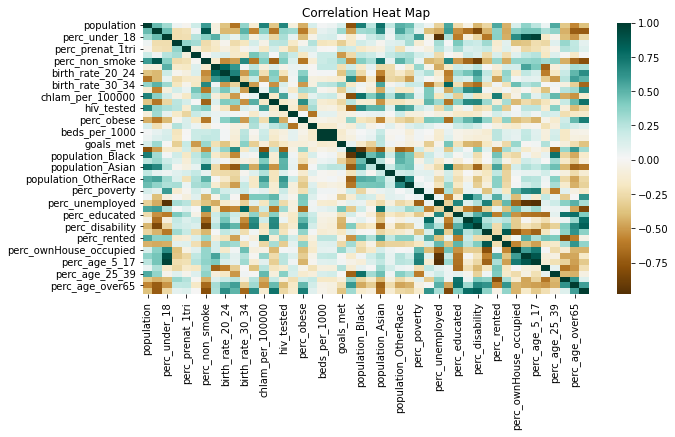

In [56]:
plt.figure(figsize=(10,5))
plt.title('Correlation Heat Map')
sns.heatmap(dat.corr(), cmap='BrBG')

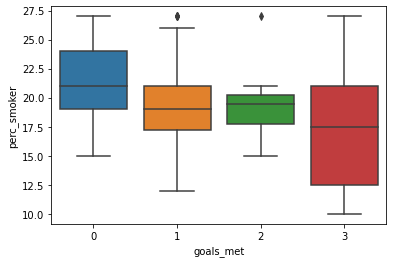

In [52]:
sns.boxplot(x='goals_met', y='perc_smoker', data=dat)
plt.show()

In [53]:
dat.goals_met.value_counts()

1    30
0    21
2     8
3     8
Name: goals_met, dtype: int64

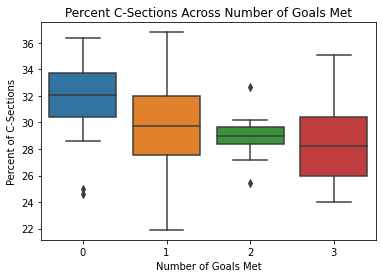

In [57]:
sns.boxplot(x='goals_met', y='perc_csec', data=dat)
plt.ylabel('Percent of C-Sections')
plt.xlabel('Number of Goals Met')
plt.title('Percent C-Sections Across Number of Goals Met')
plt.show()

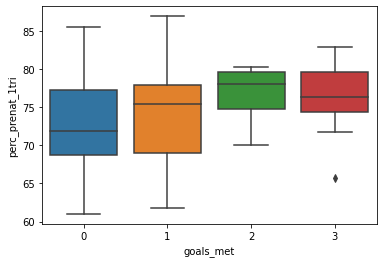

In [39]:
sns.boxplot(x='goals_met', y='perc_prenat_1tri', data=dat)
plt.show()

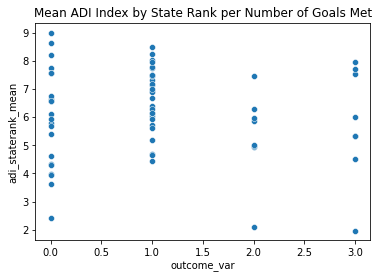

In [96]:
sns.scatterplot(x='outcome_var', y='adi_staterank_mean', data=df)
plt.title('Mean ADI Index by State Rank per Number of Goals Met')
plt.show()

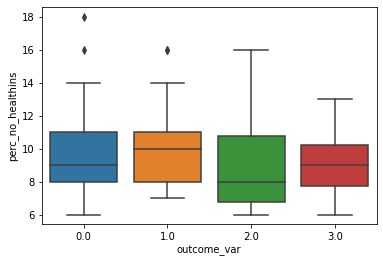

In [41]:
sns.boxplot(x='outcome_var', y='perc_no_healthins', data=dat)
plt.show()